<a href="https://colab.research.google.com/github/ShivM99/Python-ML/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!unzip /content/onlinefraud.zip

Archive:  /content/onlinefraud.zip
replace onlinefraud.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: onlinefraud.csv         


In [ ]:
import glob
file_path = glob.glob ('/content/onlinefraud')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [ ]:
# Importing the dataset as dataframe
data = pd.read_csv ("onlinefraud.csv") # Read the CSV file into a df
print (data.shape) # Give number of rows & columns in the df
print ('*' * 100)
print (data.columns) # Give the names of the columns
print ('*' * 100)
print (data.dtypes.value_counts()) # Give the number of columns of each datatype
print ('*' * 100)
print (data.columns [data.dtypes != 'object']) # Gives an array of columns of numerical datatype
print ('*' * 100)
print (data.columns [data.dtypes == 'object']) # Give an array of columns of categorical datatype

(6362620, 11)
****************************************************************************************************
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
****************************************************************************************************
float64    5
int64      3
object     3
dtype: int64
****************************************************************************************************
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
****************************************************************************************************
Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
data['type'] = data['type'].astype ('category')
data['isFraud'] = data['isFraud'].astype ('category')
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype ('category')

In [ ]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         category
 10  isFlaggedFraud  category
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 406.5+ MB
None


In [ ]:
print (data.describe().transpose()) # Give descriptive statistics of the df

                    count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   

                       50%           75%           max  
step               239.000  3.350000e+02  7.430000e+02  
amount           74871.940  2.087215e+05  9.244552e+07  
oldbalanceOrg    14208.000  1.073152e+05  5.958504e+07  
newbalanceOrig       0.000  1.442584e+05  4.958504e+07  
oldbalanceDest  132705.665  9.430367e+05  3.560159e+08  
newbalanceDest  214661.440  1.111909e+06  3.561793e+08  


In [ ]:
print (data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


[99.87091795518198, 0.12908204481801522]


Text(0.5, 1.0, '0: No Fraud \n 1: Fraud')

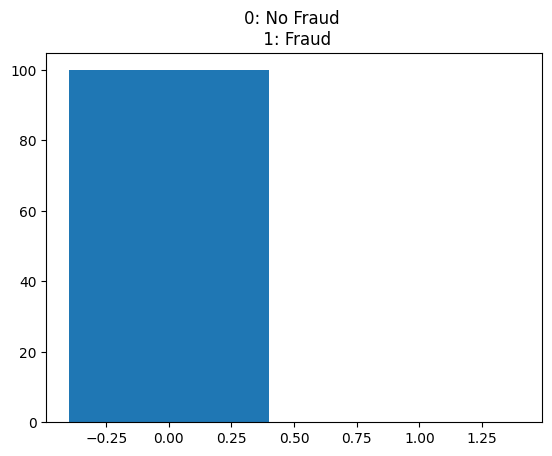

In [ ]:
output = [0, 1]
output_cent = [data['isFraud'].value_counts()[0]*100/len(data), data['isFraud'].value_counts()[1]*100/len(data)]
print (output_cent)
plt.bar (output, output_cent)
plt.title ('0: No Fraud \n 1: Fraud')

type      isFraud
CASH_IN   0          1399284
          1                0
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
          1                0
PAYMENT   0          2151495
          1                0
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64


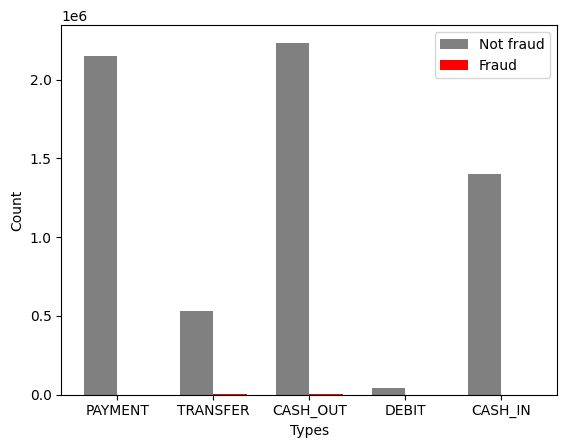

In [ ]:
# Count of non-fraudulant (0) & fraudulant (1) transactions for each type
print (data.groupby('type')['isFraud'].value_counts())
zeros = []
ones = []
unique_types = data['type'].unique()
for i in unique_types:
  zeros.append (data[data['type']==i]['isFraud'].value_counts().loc[0])
  ones.append (data[data['type']==i]['isFraud'].value_counts().loc[1])
# Set the width of the bars
bar_width = 0.35
# Set the positions of the bars on the x-axis
x_axis = np.arange (len(unique_types))
# Plot the first set of bars
plt.bar (x_axis - bar_width/2, zeros, width=bar_width, label='Not fraud', color='gray')
# Plot the second set of bars
plt.bar (x_axis + bar_width/2, ones, width=bar_width, label='Fraud', color='red')
# Add labels, title, and legend
plt.xlabel ('Types')
plt.ylabel ('Count')
plt.xticks (x_axis, unique_types)
plt.legend ()
plt.show()
# We see that fraudulant transactions are prevalent in 'cash-out' & 'transfer' types

In [ ]:
# Mean transaction amount for non-fraudulant (0) & fraudulant (1) transactions
print (data.groupby('isFraud')['amount'].mean())
# We see that the mean transaction amount for fraudulant transactions is 10x higher than that for the non-fraudulant transactions

isFraud
0    1.781970e+05
1    1.467967e+06
Name: amount, dtype: float64


<ipython-input-13-7d4ca7c4016a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap (data.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', cbar=True)


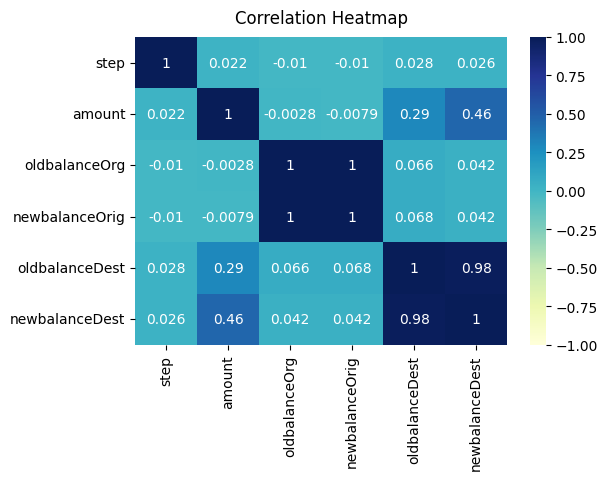

In [ ]:
plt.figure (figsize=(6, 4))
heatmap = sns.heatmap (data.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', cbar=True)
heatmap.set_title ('Correlation Heatmap', pad=10)
plt.show ()

In [ ]:
df = data.copy ()
df = df.drop (columns=['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'])
print (df)

             type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         PAYMENT     9839.64      170136.00       160296.36            0.00   
1         PAYMENT     1864.28       21249.00        19384.72            0.00   
2        TRANSFER      181.00         181.00            0.00            0.00   
3        CASH_OUT      181.00         181.00            0.00        21182.00   
4         PAYMENT    11668.14       41554.00        29885.86            0.00   
...           ...         ...            ...             ...             ...   
6362615  CASH_OUT   339682.13      339682.13            0.00            0.00   
6362616  TRANSFER  6311409.28     6311409.28            0.00            0.00   
6362617  CASH_OUT  6311409.28     6311409.28            0.00        68488.84   
6362618  TRANSFER   850002.52      850002.52            0.00            0.00   
6362619  CASH_OUT   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest isFraud  
0    

In [ ]:
df = pd.get_dummies (df, columns = ['type'])
print(df)

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0                  0.00       0             0              0           0   
1      

In [ ]:
# Extracting the features (x) & target (y) from the dataframe
x = df.iloc[:, [0, 1, 2, 3, 4, 6, 7, 8, 9, 10]].values # Matrix of features ('values' is used to convert the sliced df into array so that numpy can work on it)
y = df.iloc[:, 5].values # 1D array of target
# From now on, we will work on arrays

In [ ]:
y = y.reshape ((6362620, 1)) # Reshaping the y-array to make it 2D
print (y.shape)

(6362620, 1)


In [ ]:
# Splitting the data into training and test dataset (done BEFORE feature scaling)
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 0) #Train:Test :: 8:2


In [ ]:
# Resampling the minority class. The strategy can be changed as required
sm = SMOTE (random_state=0)
# Fit the model to generate the data.
sm_x_train, sm_y_train = sm.fit_resample (x_train, y_train)

In [ ]:
# Feature scaling -- Standardisation & Normalisation -- is performed to get all the features on the same scale, so that 1 feature do not suppress other
# Standardisation works in all situations whereas normalisation works well with normally distributed data
sc = StandardScaler ()
sm_x_train[:, 0:5] = sc.fit_transform (sm_x_train[:, 0:5])
x_test[:, 0:5] = sc.transform (x_test[:, 0:5]) # 'fit' function is not used as mean and SD of features used for test dataset is the one that was computed and used for training dataset

In [ ]:
iso_for = IsolationForest (n_estimators=100, max_samples=len(sm_x_train), random_state=0)
iso_for.fit (sm_x_train, sm_y_train)
y_pred_iso = iso_for.predict (x_test)
y_pred_iso [y_pred_iso==1] = 0
y_pred_iso [y_pred_iso==-1] = 1

In [ ]:
print ("Accuracy score:", accuracy_score (y_test, y_pred_iso))

Accuracy score: 0.9921753931556497


In [ ]:
anomaly_scores = iso_for.decision_function (x_test)
# Normalize anomaly scores to range [0, 1]
normalized_scores = (anomaly_scores - np.min(anomaly_scores)) / (np.max(anomaly_scores) - np.min(anomaly_scores))
# Convert normalized scores to probabilities
iso_prob = 1 - normalized_scores # Since, lower score means higher probability to being an outlier, so we are subtracting from 1 so that the probaility for being an outlier is higher than that being an inlier

In [ ]:
ann = Sequential ([
    Dense (input_dim=10, units=6, activation='relu'), # Creating the input layer of input_dim=#Features & the 1st hidden layer
    Dense (units=6, activation='relu'), # Creating the 2nd hidden layer
    Dense (units=1, activation='sigmoid'), # Creating the output layer
])
ann.compile (optimizer="adam", loss="binary_crossentropy", metrics=['accuracy']) # Using 'binary crossentropy' to calculate the loss, calculate accuracy & optimising weights using 'adams' (Stochastic gradient descent) to minimise the loss & maximise the accuracy

In [ ]:
ann.fit (sm_x_train, sm_y_train, batch_size=32, epochs = 5)
ann_prob = ann.predict (x_test)
y_pred_ann = (ann_prob > 0.5) # If ann_prob>0.5 is True (1), 1 will get stored in y_pred_ann, otherwise 0 will get stored
ann.save ('ANN.h5')

Epoch 1/5
317721/317721 [==============================] - 720s 2ms/step - loss: 0.0389 - accuracy: 0.9888
Epoch 2/5
317721/317721 [==============================] - 744s 2ms/step - loss: 0.0365 - accuracy: 0.9898
Epoch 3/5
317721/317721 [==============================] - 707s 2ms/step - loss: 0.0346 - accuracy: 0.9905
Epoch 4/5
317721/317721 [==============================] - 702s 2ms/step - loss: 0.0322 - accuracy: 0.9911
Epoch 5/5
39767/39767 [==============================] - 60s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print ("Accuracy score:", accuracy_score (y_test, y_pred_ann))

Accuracy score: 0.9886815494246081


In [ ]:
finalpred = (iso_prob + ann_prob)/2
finalpred = (finalpred > 0.5)

In [ ]:
print ("F1 Score:", f1_score (y_test, finalpred, average="weighted"))
print ("Accuracy score:", accuracy_score (y_test, finalpred))
print ("Confusion matrix:", confusion_matrix (y_test, finalpred))